In [7]:
import sys
from tqdm import tqdm_notebook
from glob import glob
import matplotlib.pyplot as plt

sys.path.append('..')
from seismiqb.batchflow import L, D, Pipeline, FilesIndex
from seismiqb import SeismicCropBatch, SeismicGeometry, SeismicCubeset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
%%time
path_data = '/notebooks/SEISMIC_DATA/CUBE_1/E_anon.hdf5'

dsi = FilesIndex(path=[path_data], no_ext=True)
ds = SeismicCubeset(dsi)

paths_txt = {ds.indices[0]: glob('/notebooks/SEISMIC_DATA/CUBE_1/HORIZONTS/*')}

ds = (ds.load_geometries()
        .load_point_clouds(paths = paths_txt)
        .load_labels()
        .load_samplers()
      )

# ~60 seconds

CPU times: user 49.3 s, sys: 7.63 s, total: 56.9 s
Wall time: 1min 2s


Showing labels from above for E_anon


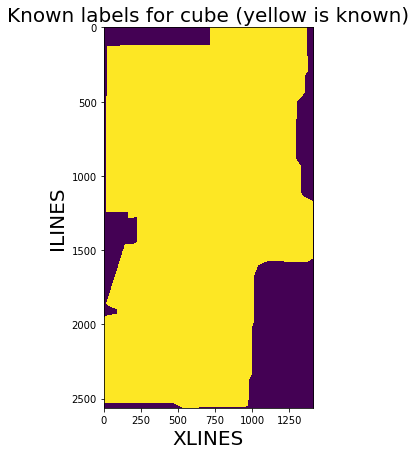

In [5]:
ds.show_labels(ds.indices[0])

In [9]:
demo_pipeline = (Pipeline()
                 .load_component(src=[D('geometries'), D('labels')],
                                 dst=['geometries', 'labels'])
                 .crop(points=L(ds.sampler.sample, 16),
                       shape=[3, 512, 512])
                 .load_cubes(fmt='h5py', dst='data_crops')
                 .create_masks(dst='mask_crops')
                 .scale(mode='normalize', src='data_crops')
                 ) << ds

demo_batch = demo_pipeline.next_batch(1, n_epochs=None)

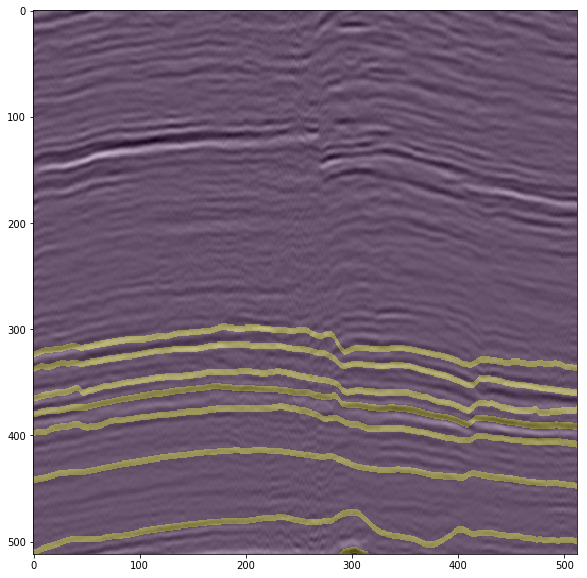

In [13]:
c = np.random.randint(16)
plt.figure(figsize=(20,10))
plt.imshow(demo_batch.data_crops[c][0, :, :].T, cmap='gray')
plt.imshow(demo_batch.mask_crops[c][0, :, :].T, alpha=0.3)
plt.show()